In [1]:
import sys
sys.path.insert(0, "..")

import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

## Comparison of states and currents for larger systems
Four electrodes are attached to the flat system at all edges.

In [2]:
net_sizes = np.arange(2, 11)
nets = [Network(size, size, 1, [[0,0,0], [size - 1, 0, 0],[0, size - 1, 0],[size - 1, size - 1, 0]]) for size in net_sizes]
mfs = [MeanField(net) for net in nets]

In [3]:
voltage_configs = np.loadtxt("../output/large_sys/voltage_configs.csv")

In [4]:
states_mf = []
for i in range(len(net_sizes)):
    size = net_sizes[i]
    state = np.loadtxt("../output/large_sys/mf/states"+str(size)+"x"+str(size)+".csv")
    states_mf.append(state)
    
currents_mf = []
for i in range(len(net_sizes)):
    size = net_sizes[i]
    current = np.loadtxt("../output/large_sys/mf/currents"+str(size)+"x"+str(size)+".csv")
    currents_mf.append(current)

In [5]:
states_kmc = []
for i in range(len(net_sizes)):
    state = np.loadtxt("../output/large_sys/kmc/mean_state_Nx="+str(net_sizes[i])+"_Ny="+str(net_sizes[i])+"_Nz=1_Ne=4.csv", delimiter=",", skiprows=1)
    states_kmc.append(state)
    
currents_kmc = []
for i in range(len(net_sizes)):
    net_size = net_sizes[i]
    data = np.loadtxt("../output/large_sys/kmc/Nx="+str(net_size)+"_Ny="+str(net_size)+"_Nz=1_Ne=4.csv", delimiter = ",", skiprows = 1)
    currents_kmc.append(data)

## 10x10

In [10]:
MAEs = []
rel_errs = []

In [11]:
for size_index, size in enumerate(net_sizes):
    size = net_sizes[size_index]

    mf_sort_indices = np.argsort(voltage_configs[:,0], axis = 0)
    kmc_sort_indices = np.argsort(currents_kmc[size_index][:,0], axis = 0)

    sorted_mf_states = states_mf[size_index][mf_sort_indices]
    sorted_mf_currents = currents_mf[size_index][mf_sort_indices]
    sorted_voltage_config = voltage_configs[mf_sort_indices]

    sorted_kmc_states = states_kmc[size_index][kmc_sort_indices]
    sorted_kmc_currents = currents_kmc[size_index][kmc_sort_indices][:, 6] / 1000 * CONST.electron_charge
    sorted_kmc_steps = currents_kmc[size_index][kmc_sort_indices][:,5]
    sorted_kmc_valid = np.where(sorted_kmc_steps < 10000000, True, False)
    sorted_kmc_valid_indices = np.where(sorted_kmc_valid)[0]

    MAE = np.mean(np.abs(sorted_mf_states - sorted_kmc_states), axis = 1)
    MAE_valid = MAE[sorted_kmc_valid_indices]

    MAEs.append(np.mean(MAE_valid))

    rel_err = np.abs((sorted_mf_currents - sorted_kmc_currents) / sorted_kmc_currents)
    rel_err_valid = rel_err[sorted_kmc_valid_indices]
    rel_errs.append(np.mean(rel_err_valid))

Text(0, 0.5, 'MAE for states in electron charges')

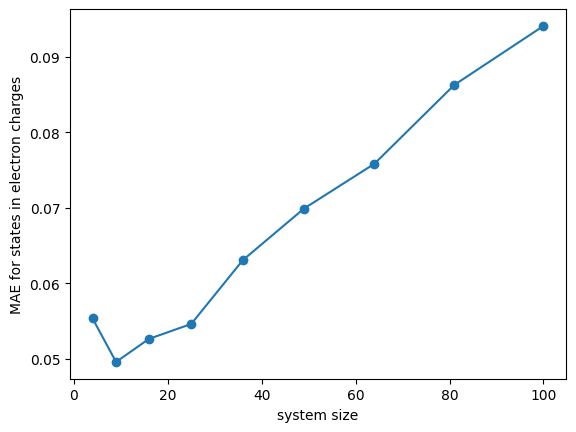

In [14]:
plt.plot(net_sizes**2, np.array(MAEs) / CONST.electron_charge, label = "states", marker = "o")
plt.xlabel("system size")
plt.ylabel("MAE for states in electron charges")

Text(0, 0.5, 'relative error of output currents')

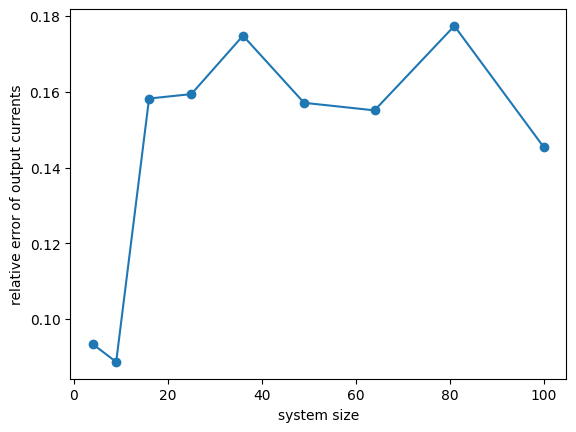

In [15]:
plt.plot(net_sizes**2, rel_errs, label = "currents", marker = "o")
plt.xlabel("system size")
plt.ylabel("relative error of output currents")

### closeup

In [16]:
size_index = 8
size = net_sizes[size_index]

In [17]:
mf_sort_indices = np.argsort(voltage_configs[:,0], axis = 0)
kmc_sort_indices = np.argsort(currents_kmc[size_index][:,0], axis = 0)

In [18]:
sorted_mf_states = states_mf[size_index][mf_sort_indices]
sorted_mf_currents = currents_mf[size_index][mf_sort_indices]
sorted_voltage_config = voltage_configs[mf_sort_indices]

In [19]:
sorted_kmc_states = states_kmc[size_index][kmc_sort_indices]
sorted_kmc_currents = currents_kmc[size_index][kmc_sort_indices][:, 6] / 1000 * CONST.electron_charge
sorted_kmc_steps = currents_kmc[size_index][kmc_sort_indices][:,5]
sorted_kmc_valid = np.where(sorted_kmc_steps < 10000000, True, False)
sorted_kmc_valid_indices = np.where(sorted_kmc_valid)[0]

In [21]:
MAE = np.mean(np.abs(sorted_mf_states - sorted_kmc_states), axis = 1)
MAE_valid = MAE[sorted_kmc_valid_indices]

In [22]:
np.mean(MAE_valid)

0.01507683297050695

In [23]:
rel_err = np.abs((sorted_mf_currents - sorted_kmc_currents)/sorted_kmc_currents)

In [24]:
rel_err_valid = rel_err[sorted_kmc_valid_indices]

In [25]:
np.mean(rel_err_valid)

0.14543720007655825

In [26]:
i = np.random.randint(100)

MAE: 0.015472969161558605


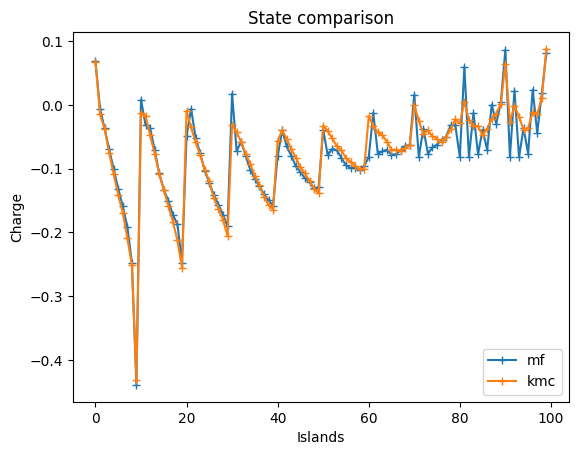

In [33]:
print("MAE:", MAE[i])
xs = np.arange(size ** 2)
plt.plot(xs, sorted_mf_states[i], label = "mf", marker = "+")
plt.plot(xs, sorted_kmc_states[i], label = "kmc", marker = "+")
plt.xlabel("Islands")
plt.ylabel("Charge")
plt.title("State comparison")
plt.legend()

Text(0.5, 1.0, 'output currents for different voltage configs')

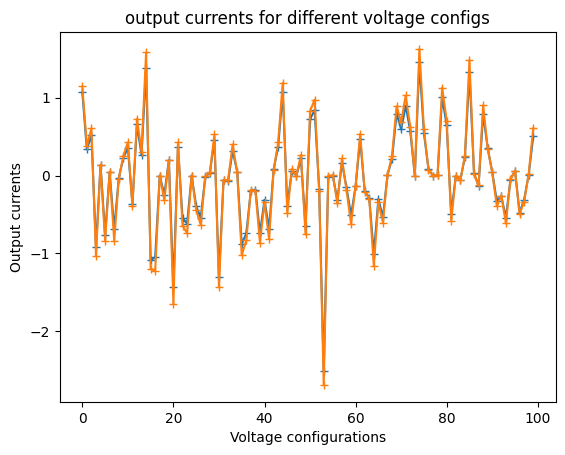

In [34]:
plt.plot(sorted_mf_currents, marker = "+")
plt.plot(sorted_kmc_currents, marker = "+")
plt.xlabel("Voltage configurations")
plt.ylabel("Output currents")
plt.title("output currents for different voltage configs")